In [1]:
%matplotlib inline

import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import preprocessing, neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import seaborn as sns

import numpy as np

df = pd.read_csv(r'bank.csv', sep=';')

In [2]:
warnings.simplefilter('ignore') #Скрыть все предупреждения от пользователей по умолчанию

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

In [3]:
tabledata = [["Age","Возраст", "числовой"],
             ["Job", "Место работы", "администратор; неизвестный; безработный; менеджмент; домработница; предприниматель; студент; рабочие; самозанятые; пенсионеры; техник; услуги"],
             ["Marital", "Семейное положение", "женат; разведен; холост"],
             ["Education", "Образование", "неизвестный; вторичный; первичный; третичный"],
             ["Default", "Невыполненные обязательства", "да; нет"],
             ["Balance", "Баланс", "числовой"],
             ["Housing", "Есть жилищный кредит?", "да; нет"], 
             ["Loan", "Есть личный заем?", "да; нет"],
             ["Contact", "Контактный вид связи", "неизвестно; телефон; сотовая связь"],
             ["Day", "Последний контактный день месяца", "числовой"],
             ["Month", "Последний контактный месяц года", "jan-dec"],
             ["Duration", "Длительность последнего контакта, в секундах", "числовой"],
             ["Campaing", "Количество контактов, выполненных во время этой кампании и для этого клиента", "числовой"],
             ["Pdays", "Количество дней, прошедших с момента последнего обращения к клиенту из предыдущей кампании", "числовой"],
             ["Previous", "Количество контактов, выполненных до этой кампании и для этого клиента", "числовой"],
             ["Poutcome", "Результат предыдущей маркетинговой кампании", "неизвестно; другое; успешно; неудача"],
             ["Y", "Клиент подписался на срочный депозит?", "да; нет"],]
tabledata
pd.DataFrame(tabledata, columns=["Переменная","Описание", "Параметры(Ключи)"])

,Переменная,Описание,Параметры(Ключи)
0,Age,Возраст,числовой
1,Job,Место работы,администратор; неизвестный; безработный; менед...
2,Marital,Семейное положение,женат; разведен; холост
3,Education,Образование,неизвестный; вторичный; первичный; третичный
4,Default,Невыполненные обязательства,да; нет
5,Balance,Баланс,числовой
6,Housing,Есть жилищный кредит?,да; нет
7,Loan,Есть личный заем?,да; нет
8,Contact,Контактный вид связи,неизвестно; телефон; сотовая связь
9,Day,Последний контактный день месяца,числовой


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [5]:
df.shape

(4521, 17)

In [6]:
df = df.drop_duplicates()
df.shape

(4521, 17)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 3. Оцените сбалансированность данных по классам (постройте гистограмму).

<AxesSubplot:>

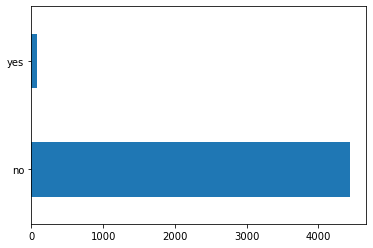

In [8]:
df['default'].value_counts().plot(kind='barh')

##### Соотношение количество элементов отличается,значит классы несбалансированны. Будем использовать ROC-кривую, т.к. она дает адекватную оценку качества работы алгоритма, где классы несбалансированны и их размеры выборки отличаются друг от друга.

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования.

In [9]:
numerical = [i for i in df.columns if df[i].dtype.name != 'object'] # цикл для отбра колонок с количественными признаками
categorial = [i for i in df.columns if df[i].dtype.name == 'object'] # цикл для отбора качественных признаков
print("Numerical",numerical)
print("Categorial",categorial)

Numerical ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorial ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


<AxesSubplot:>

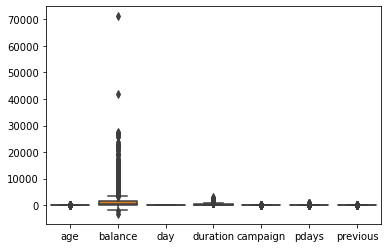

In [10]:
sns.boxplot(data=df[numerical]) #Вывод диаграммы boxplot количествнных столбцов

<AxesSubplot:>

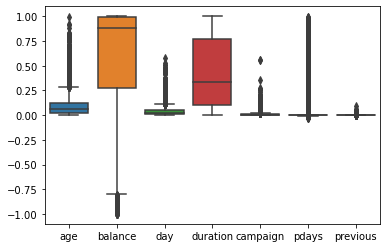

In [11]:
df[numerical] = preprocessing.normalize(df[numerical]) #normalize() - Этот метод нормализует данные по строке
sns.boxplot(data=df[numerical]) #вывод маштабированной диаграммы boxplot

In [12]:
df #после нормализации все значения теперь находятся в диапазоне от 0 до 1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.016768,unemployed,married,primary,no,0.998827,no,no,cellular,0.010620,oct,0.044156,0.000559,-0.000559,0.000000,unknown,no
1,0.006866,services,married,secondary,no,0.996432,yes,yes,cellular,0.002289,may,0.045775,0.000208,0.070535,0.000832,failure,no
2,0.024955,management,single,tertiary,no,0.962542,yes,no,cellular,0.011408,apr,0.131904,0.000713,0.235288,0.000713,failure,no
3,0.020139,management,married,tertiary,no,0.990827,yes,yes,unknown,0.002014,jun,0.133587,0.002685,-0.000671,0.000000,unknown,no
4,0.252534,blue-collar,married,secondary,no,0.000000,yes,no,unknown,0.021401,may,0.967332,0.004280,-0.004280,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.070174,services,married,secondary,no,-0.708118,yes,no,cellular,0.063794,jul,0.699612,0.010632,-0.002126,0.000000,unknown,no
4517,0.017184,self-employed,married,tertiary,yes,-0.998784,yes,yes,unknown,0.002713,may,0.046126,0.000301,-0.000301,0.000000,unknown,no
4518,0.169148,technician,married,secondary,no,0.875413,no,no,cellular,0.056383,aug,0.448093,0.032643,-0.002968,0.000000,unknown,no
4519,0.024056,blue-collar,married,secondary,no,0.976847,no,no,cellular,0.005155,feb,0.110830,0.003437,0.181280,0.002577,other,no


### 5. Выполните замену категориальных признаков;выберите и обоснуйте способ замены

In [13]:
labelEncoder = LabelEncoder() #Создание экземпляра объекта LabelEncoder
df['job'] = labelEncoder.fit_transform(df['job']) 
df['marital'] = labelEncoder.fit_transform(df['marital']) 
df['education'] = labelEncoder.fit_transform(df['education']) 
df['default'] = labelEncoder.fit_transform(df['default']) 
df['housing'] = labelEncoder.fit_transform(df['housing']) 
df['loan'] = labelEncoder.fit_transform(df['loan']) 
df['contact'] = labelEncoder.fit_transform(df['contact']) 
df['month'] = labelEncoder.fit_transform(df['month']) 
df['poutcome'] = labelEncoder.fit_transform(df['poutcome']) 
df['y'] = labelEncoder.fit_transform(df['y']) 
df #Вывод таблицы

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.016768,10,1,0,0,0.998827,0,0,0,0.010620,10,0.044156,0.000559,-0.000559,0.000000,3,0
1,0.006866,7,1,1,0,0.996432,1,1,0,0.002289,8,0.045775,0.000208,0.070535,0.000832,0,0
2,0.024955,4,2,2,0,0.962542,1,0,0,0.011408,0,0.131904,0.000713,0.235288,0.000713,0,0
3,0.020139,4,1,2,0,0.990827,1,1,2,0.002014,6,0.133587,0.002685,-0.000671,0.000000,3,0
4,0.252534,1,1,1,0,0.000000,1,0,2,0.021401,8,0.967332,0.004280,-0.004280,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.070174,7,1,1,0,-0.708118,1,0,0,0.063794,5,0.699612,0.010632,-0.002126,0.000000,3,0
4517,0.017184,6,1,2,1,-0.998784,1,1,2,0.002713,8,0.046126,0.000301,-0.000301,0.000000,3,0
4518,0.169148,9,1,1,0,0.875413,0,0,0,0.056383,1,0.448093,0.032643,-0.002968,0.000000,3,0
4519,0.024056,1,1,1,0,0.976847,0,0,0,0.005155,3,0.110830,0.003437,0.181280,0.002577,1,0


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

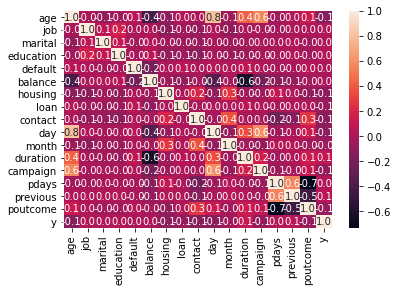

In [14]:
corr_df = df.corr() #создание нового фрейма по корреляции
sns.heatmap(corr_df, annot=True, fmt='.1f')
#Метод .corr() - будет добавлен к данным в качестве первого аргумента
#annot=True, который помогает отобразить коэффициент корреляции.
# fmt = '.1g' - отображение одной цифры, после запятой 

### 7. Заполните пропущенные значения в данных

In [15]:
df.notnull().count() #вывод ненулевых значений и их подсчет

age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome     4521
y            4521
dtype: int64

##### Пропущенных значений нет

### 8.Решите поставленную задачу классификации в соответствии с заданием.

In [16]:
x = np.array(df.drop('poutcome', axis=1)) #переменная x содержит массив с данными
y = np.array(df['poutcome']) #Переменная y содержит массив классов
#Бинаризируем выходные данные(преобразуем свои данные, используя двоичный порог. Все значения выше порога помечены как 1, а все равные или ниже помечены как 0.)
y = label_binarize(y, classes=[0, 1, 2]) 
n_classes = y.shape[1]
# Перетасовка и разделение тренировочного и тестового набораююЧтобы избежать переобучения, мы разделим наш набор данных на обучающие и тестовые разбиения, что даст нам лучшее представление о том, как работает наш алгоритм на этапе тестирования.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)#разбивает набор данных на 50% обучающих данных и 50% тестовых данных.
print(X_train.shape) #Обучающий набор
print(X_test.shape) #текстовый набор

(2260, 16)
(2261, 16)


### Классификатор К соседей

In [17]:
knn = KNeighborsClassifier() #Классификатор К ближайших соседей

find = GridSearchCV(knn,{'n_neighbors':range(1,50)}) #Gridsearch подбирает наилучшие параметры для классификатора(соседи)
find.fit(X_train,y_train)

neighbor = find.best_estimator_.n_neighbors #записываем количество соседей
best_score = find.best_score_ #лучшее значение классификатора, которое он выдает

knn = KNeighborsClassifier(n_neighbors=neighbor)#передаем классификатору neighbor количество соседей
knn.fit(X_train,y_train) #обучаем его
predict = knn.predict(X_test) #предсказанные значения 
print('Accuracy of KNN model: ',accuracy_score(y_test,predict)) #выводим точность
print('Best score: ',best_score,'Neighbor: ',neighbor) #Выводим наилучший счет и количество соседей

Accuracy of KNN model:  0.8279522335249889
Best score:  0.8323008849557523 Neighbor:  3


### Логический классификатор(бинарное решающее дерево)

In [18]:
dtc = DecisionTreeClassifier() #классификатор решающего дерева


dtc_grid = GridSearchCV(dtc, {'max_depth':list(range(1,100)),'max_features':list(range(1,5))})#Gridsearch подбирает наилучшие параметры для классификатора(Глубина и количество признаков)
dtc_grid.fit(X_train,y_train)

best_depth = dtc_grid.best_estimator_.max_depth #записываем лучший показатель шлубины
best_features = dtc_grid.best_estimator_.max_features #записываем лучший показатель количества признаков

dtc = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features) #передаем классификатору dtc эти параметры
dtc.fit(X_train, y_train) #обучаем его
predict = dtc.predict(X_test) #предсказанные значения
accuracy_score = np.mean(y_test == dtc.predict(X_test)) #новой переменной присваивается показатель точности

print('Accuracy of DTC model: ',accuracy_score) #выводим точность классификатора
print('Best score: ', dtc_grid.best_score_) #выводим лучший результат классификатора
print('On depth ',best_depth,' features ',best_features) #выводим глубино и количество признаков

Accuracy of DTC model:  0.9338051009877635
Best score:  0.9212389380530974
On depth  98  features  4


### ROC-кривая

<Figure size 720x576 with 0 Axes>

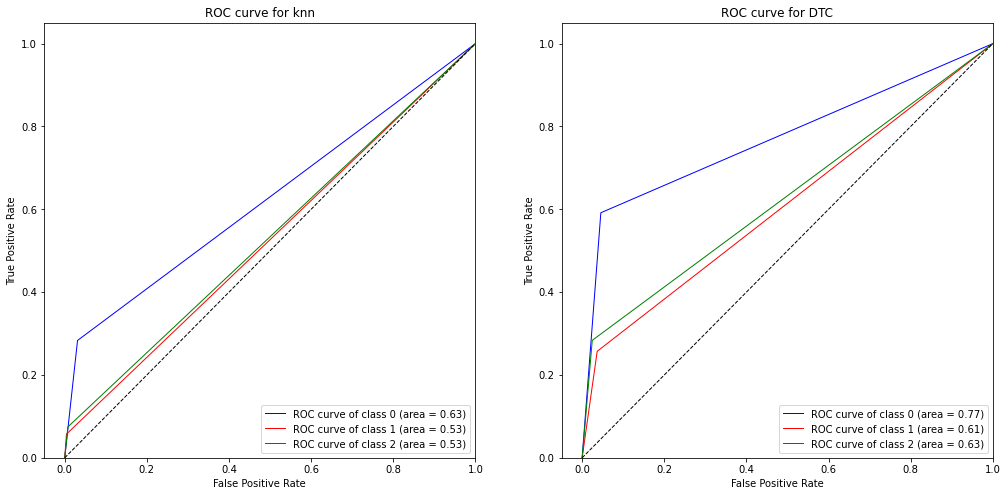

In [19]:
plt.figure(figsize=(10,8))
fig, (ax_0, ax_1) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))  #разбиваем область на два графика

predict = knn.predict(X_test) #график для К соседей
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): #цикл который для каждого класса строит кривую
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors): #цикл считает площадь под кривой
    ax_0.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([-0.05, 1.0])
ax_0.set_ylim([0.0, 1.05])
ax_0.set_xlabel('False Positive Rate')
ax_0.set_ylabel('True Positive Rate')
ax_0.set_title('ROC curve for knn')
ax_0.legend(loc="lower right")

predict = dtc.predict(X_test) #график для решающего дерева
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes) :#цикл который для каждого класса строит кривую
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):  #цикл считает площадь под кривой
    ax_1.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([-0.05, 1.0]) #значение по оси x
ax_1.set_ylim([0.0, 1.05]) #значение по оси y
ax_1.set_xlabel('False Positive Rate') #название по оси x
ax_1.set_ylabel('True Positive Rate') #название по оси x
ax_1.set_title('ROC curve for DTC') #вывод площадь под кривой
ax_1.legend(loc="lower right")

plt.show()

### PR-кривая

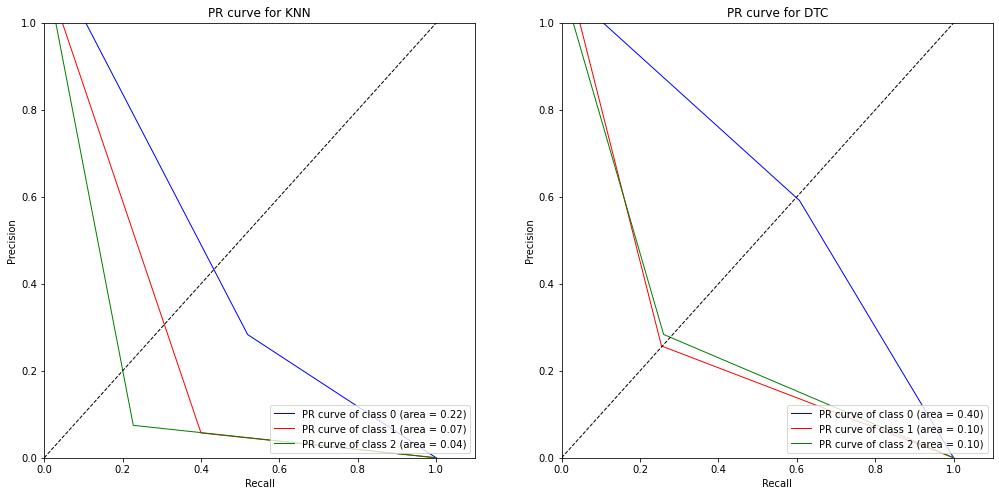

In [20]:
fig, (ax_0, ax_1) = plt.subplots( nrows=1, ncols=2, figsize=(17, 8))  

predict = knn.predict(X_test)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predict[:, i])
    aps[i] = average_precision_score(y_test[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_0.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([0.0, 1.1])
ax_0.set_ylim([0.0, 1.0])
ax_0.set_xlabel('Recall')
ax_0.set_ylabel('Precision')
ax_0.set_title('PR curve for KNN')
ax_0.legend(loc="lower right")



predict = dtc.predict(X_test)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predict[:, i])
    aps[i] = average_precision_score(y_test[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_1.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([0.0, 1.1])
ax_1.set_ylim([0.0, 1.0])
ax_1.set_xlabel('Recall')
ax_1.set_ylabel('Precision')
ax_1.set_title('PR curve for DTC')
ax_1.legend(loc="lower right")
plt.show()

### Метод K ближайших соседей имеет лучший показатель точности